In [2]:
import scipy.stats 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
#https://www.kaggle.com/contactprad/bike-share-daily-data
data = pd.read_csv("/Users/msantos/Downloads/bike-share-daily-data/bike_sharing_daily.csv")

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
data['x'] = range(data.shape[0])

In [7]:
xout = range(data.shape[0], data.shape[0]+60)

In [8]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,x
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


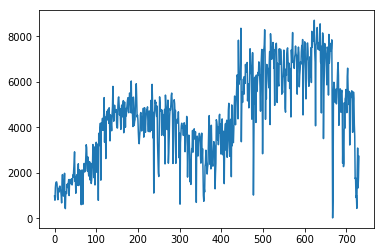

In [9]:
plt.plot(data['x'],data['cnt'])

In [10]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(data['x'],data['cnt'])

In [11]:
slope

5.7688183284113785

In [12]:
line = slope*data['x']+intercept
line2 = slope*xout+intercept

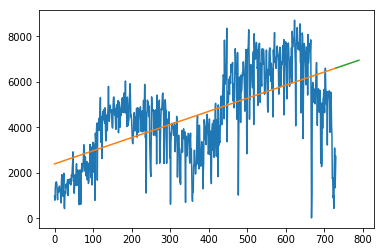

In [13]:
plt.plot(data['x'],data['cnt'])
plt.plot(data['x'],line)
plt.plot(xout, line2)

In [14]:
import numpy as np

In [15]:
z = np.polyfit(data['x'],data['cnt'], 3)

In [16]:
p = np.poly1d(z)

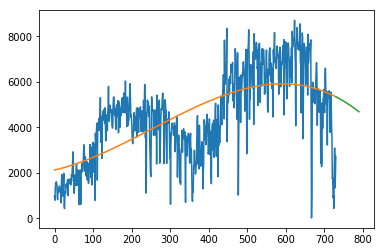

In [17]:
plt.plot(data['x'],data['cnt'])
plt.plot(data['x'],p(data['x']))
plt.plot(xout,p(xout))


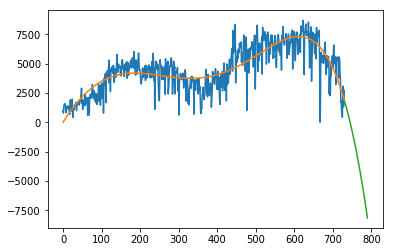

In [18]:
z = np.polyfit(data['x'],data['cnt'], 5)
p = np.poly1d(z)
plt.plot(data['x'],data['cnt'])
plt.plot(data['x'],p(data['x']))
plt.plot(xout,p(xout))


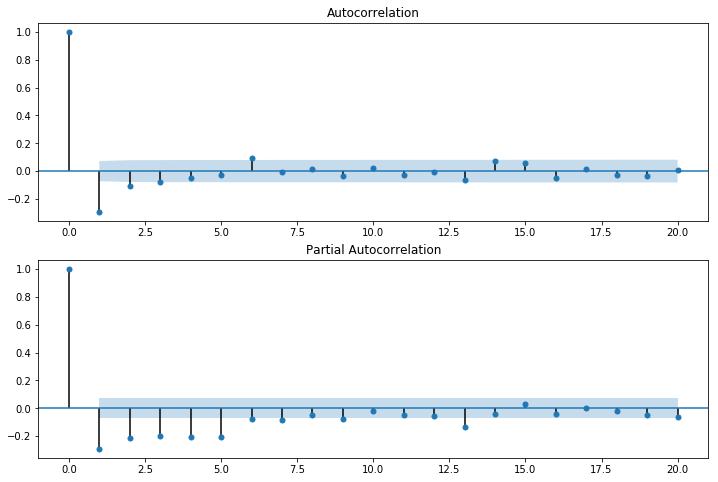

In [19]:
#https://machinelearningmastery.com/time-series-forecast-case-study-python-monthly-armed-robberies-boston/
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

#pandas has a built in differencing function, but it leaves an NA in the first position
series2 = data['cnt'].diff()
pyplot.figure(figsize=(12,8))
pyplot.subplot(211)
plot_acf(series2[1:], lags=20, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series2[1:], lags=20, ax=pyplot.gca())
pyplot.show()


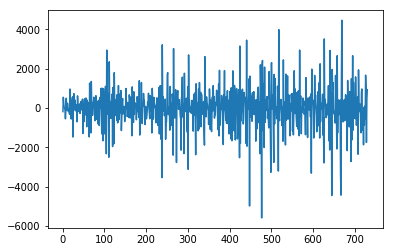

In [20]:
plt.plot(data['x'][1:],series2[1:])


In [21]:
#https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model = ARIMA(data['cnt'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                  730
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6029.309
Method:                       css-mle   S.D. of innovations            934.413
Date:                Mon, 22 Apr 2019   AIC                          12072.617
Time:                        16:27:14   BIC                          12104.768
Sample:                             1   HQIC                         12085.021
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3613     12.739      0.107      0.915     -23.607      26.330
ar.L1.D.cnt    -0.4776      0.036    -13.180      0.000      -0.549      -0.407
ar.L2.D.cnt    -0.3969      0.039    -10.219    

In [23]:
output = model_fit.forecast(60)

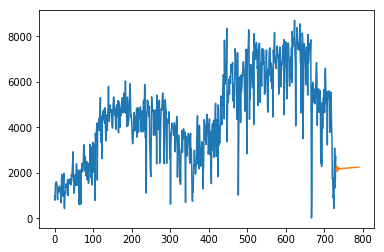

In [24]:
plt.plot(data['x'],data['cnt'])
plt.plot(xout,output[0])


In [25]:
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.arma_order_select_ic.html
import statsmodels.api as sm

In [26]:
res = sm.tsa.arma_order_select_ic(series2[1:], ic=['aic'], trend='nc')

/usr/local/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/usr/local/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/usr/local/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

In [27]:
res.aic_min_order

(1, 1)

In [28]:
model = ARIMA(data['cnt'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.cnt   No. Observations:                  730
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6021.891
Method:                       css-mle   S.D. of innovations            924.804
Date:                Mon, 22 Apr 2019   AIC                          12051.781
Time:                        16:27:20   BIC                          12070.153
Sample:                             1   HQIC                         12058.869
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.1305      5.919      0.360      0.719      -9.471      13.732
ar.L1.D.cnt     0.3592      0.042      8.497      0.000       0.276       0.442
ma.L1.D.cnt    -0.8904      0.019    -46.490    

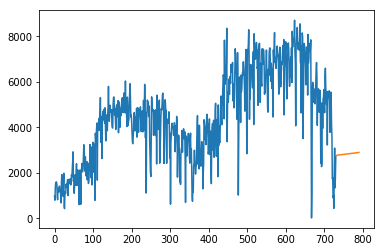

In [29]:
output = model_fit.forecast(60)
plt.plot(data['x'],data['cnt'])
plt.plot(xout,output[0])

In [30]:
#https://research.fb.com/prophet-forecasting-at-scale/
#https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [31]:
from fbprophet import Prophet


In [32]:
mydf = data[['dteday', 'cnt']]
mydf = mydf.rename(index=str, columns={"dteday": "ds", "cnt": "y"})


In [33]:
m2 = Prophet()
m2.fit(mydf)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


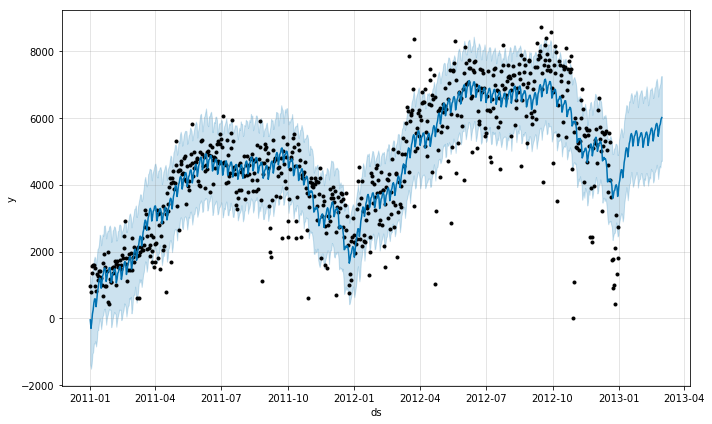

In [34]:
future = m2.make_future_dataframe(periods=60)
forecast = m2.predict(future)
fig1 = m2.plot(forecast)

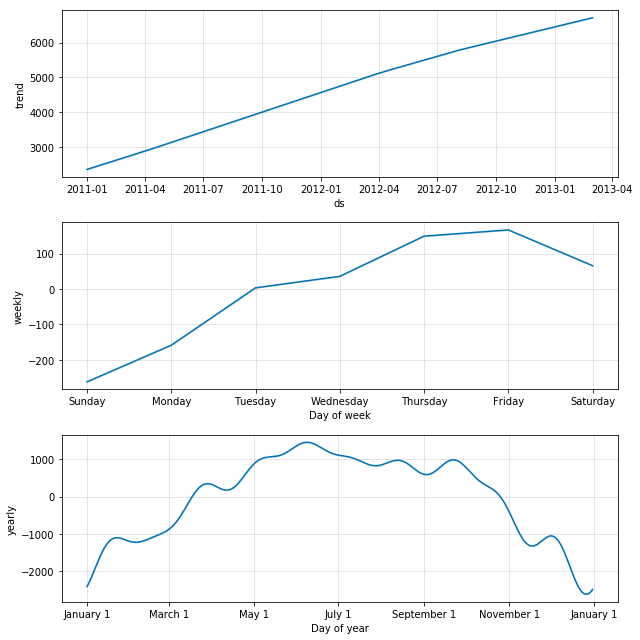

In [35]:
fig2 = m2.plot_components(forecast)


In [36]:
m3 = Prophet()
m3.add_country_holidays(country_name='US')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


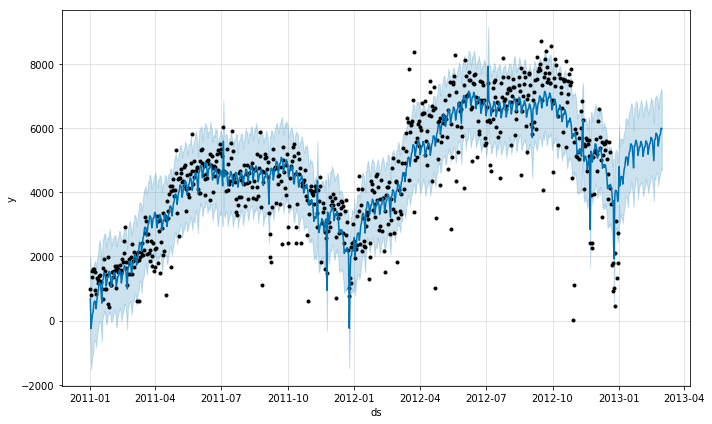

In [37]:
m3.fit(mydf)
forecast = m3.predict(future)
fig1 = m3.plot(forecast)

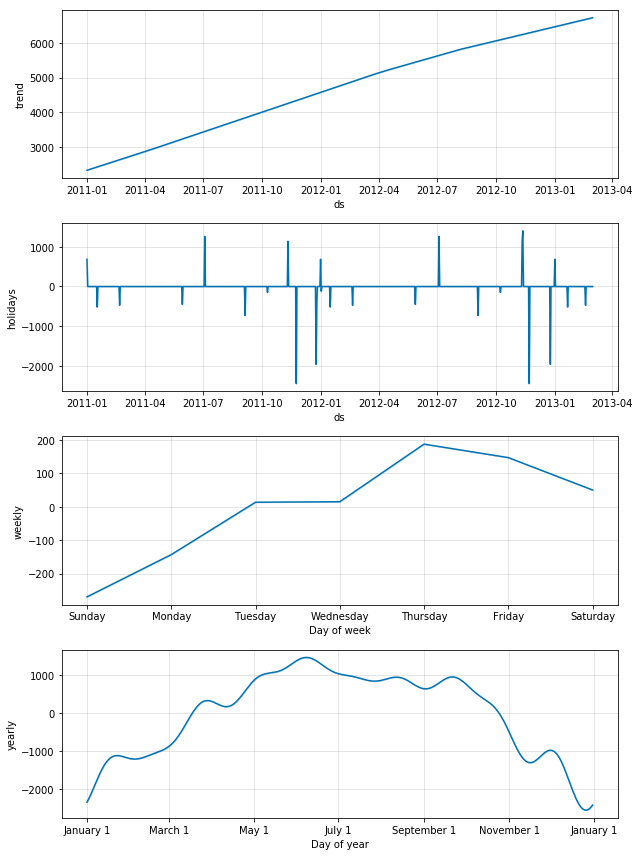

In [38]:
fig2 = m3.plot_components(forecast)


# Looking at Model Fit

In [39]:
from sklearn.metrics import mean_squared_error
import math

In [40]:
training = data[:-60]

In [41]:
test = data[-60:]

### OLS

In [42]:
#OLS
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(training['x'],training['cnt'])

In [43]:
fitols = slope*test['x']+intercept

In [44]:
math.sqrt(mean_squared_error(test['cnt'], fitols))

3204.640298705231

### Polynomial

In [45]:
z = np.polyfit(training['x'],training['cnt'], 3)
p = np.poly1d(z)
math.sqrt(mean_squared_error(test['cnt'], p(test['x'])))

4837.992211363332

### ARIMA

In [46]:
model = ARIMA(data['cnt'], order=(1,1,1))
model_fit = model.fit(disp=0)
arimafit = model_fit.forecast(60)
math.sqrt(mean_squared_error(test['cnt'], arimafit[0]))

2318.013564362021

### Prophet

In [47]:
mytraining = training.rename(index=str, columns={"dteday": "ds", "cnt": "y"})


In [48]:
m3 = Prophet()
m3.add_country_holidays(country_name='US')
m3.fit(mydf)
future = m3.make_future_dataframe(periods=60)
forecast = m3.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [49]:
math.sqrt(mean_squared_error(test['cnt'],forecast['yhat'][-60:]))

1990.6959838455496

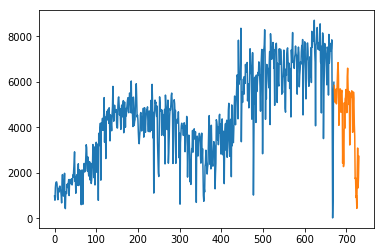

In [51]:
plt.plot(training['x'],training['cnt'])
plt.plot(test['x'],test['cnt'])


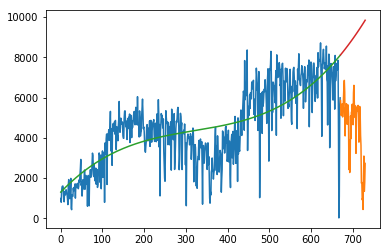

In [52]:
plt.plot(training['x'],training['cnt'])
plt.plot(test['x'],test['cnt'])
plt.plot(training['x'],p(training['x']))
plt.plot(test['x'],p(test['x']))